<a href="https://colab.research.google.com/github/okada-t-rafael/predictive_analysis_study/blob/main/AnalisePreditivaAvancada_TrabalhoFinal_RafaelOkada_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Preditiva Avançada - Trabalho Final

por: Rafael Tamotsu Okada, A57627262.

**Contexto**

Dataset originalizado pela *National Institute of Diabetes and Digestive and Kidney Diseases*. O objetivo é realizar a predição se um paciente tem diabetes baseado nas medições de seu diagnóstico. Diversas restrições foram levantadas durante a seleção destas observações. Em particular, todos os pacientes deste database são mulheres com pelo menos 21 anos decentens de Pima, povo nativo dos Estados Unidos da América.

**Fontes**

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader, Applied Physics Laboratory, The Johns Hopkins University, Johns Hopkins Road, Laurel, MD 20707, (301) 953-6231

(c) Kaggle: https://www.kaggle.com/mathchi/diabetes-data-set, acessado em 19 de setembro, 2020 às 16:10.

# 0. Sumário


1.   Importação dos Dados
2.   Análise Exploratória
3.   Balanceamento do Dataset
4.   Separação Base Treino / Base Teste
5.   Modelagem e Teste (SVM Classifier)
6.   Modelagem e Teste (Logistic Regression)
7.   Modelagem e Teste (KNeighbors Classifier)
8.   Modelagem e Teste (Random Forest)
9.   Modelagem e Teste (Ensemble Model)



# 1. Importação dos Dados

In [ ]:
# Upload datafiles to google colab
# from google.colab import files
# data = files.upload()

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Análise Exploratória e Tratamento dos Dados


**Dicionário de Dados**

* Pregnancies: Número de gravidezes;
* Glucose: Glicose plasmatica pos prandial 2 horas;
* BloodPressure: Pressão arterial diastólica (mm Hg);
* SkinThickness: Espessura da dobra da pele do tríceps (mm);
* Insulin: Insulina sérica de 2 horas (mu U / ml);
* BMI: Índice de massa (peso em kg / (altura em m) ^ 2);
* DiabetesPedigreeFunction: Função Diabetes pedigree;
* Age: Idade (anos);
* Outcome: Class variable (0: negativo e 1: positivo para diabetes);

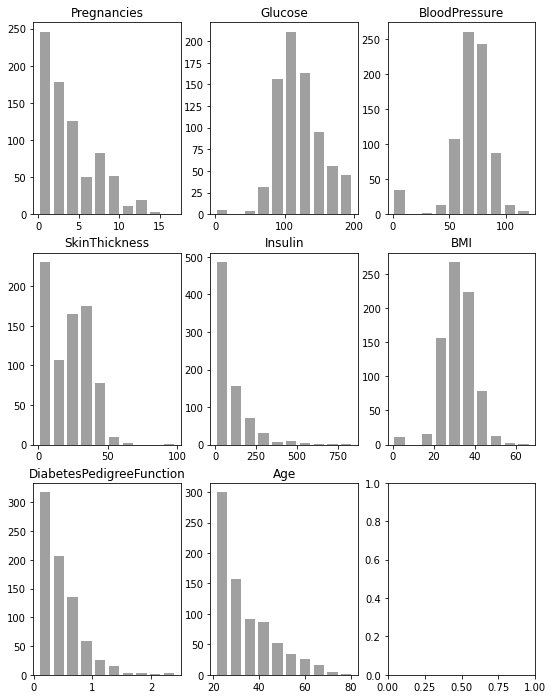

In [ ]:
# Overall view of the dataset!
fig, axs = plt.subplots(3, 3)
fig.set_figheight(12)
fig.set_figwidth(9)

bins = 10

axs[0, 0].hist(df['Pregnancies'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 0].set_title('Pregnancies')
axs[0, 1].hist(df['Glucose'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 1].set_title('Glucose')
axs[0, 2].hist(df['BloodPressure'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 2].set_title('BloodPressure')
axs[1, 0].hist(df['SkinThickness'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 0].set_title('SkinThickness')
axs[1, 1].hist(df['Insulin'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 1].set_title('Insulin')
axs[1, 2].hist(df['BMI'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 2].set_title('BMI')
axs[2, 0].hist(df['DiabetesPedigreeFunction'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[2, 0].set_title('DiabetesPedigreeFunction')
axs[2, 1].hist(df['Age'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[2, 1].set_title('Age')

fig.show()

**Missing Values**

In [ ]:
# Checking Missing Values =(
print("- Glucose       : " + f"{df['Glucose'].value_counts()[0]}".rjust(4) + " / " + str(len(df)))
print("- BloodPressure : " + f"{df['BloodPressure'].value_counts()[0]}".rjust(4) + " / " + str(len(df)))
print("- SkinThickness : " + f"{df['SkinThickness'].value_counts()[0]}".rjust(4) + " / " + str(len(df)))
print("- Insulin       : " + f"{df['Insulin'].value_counts()[0]}".rjust(4) + " / " + str(len(df)))
print("- BMI           : " + f"{df['BMI'].value_counts()[0]}".rjust(4) + " / " + str(len(df)))

# Zero for these features are Missing Values... OMG! 

- Glucose       :    5 / 768
- BloodPressure :   35 / 768
- SkinThickness :  227 / 768
- Insulin       :  374 / 768
- BMI           :   11 / 768


**Tratamento das features: Glucose, BloodPressure and BMI (Mean substitution)**

Para estas features, como a quantidade de valores 0 não eram tão altas, decidiu-se por substituí-los pela a média da coluna.

In [ ]:
cols = ['Glucose', 'BloodPressure', 'BMI']
df[cols] = df[cols].replace({0: np.nan})
df[cols] = df[cols].fillna(value=df[cols].mean())

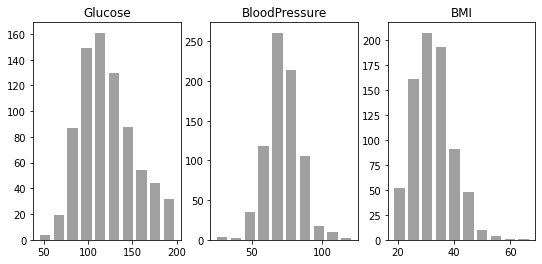

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(9)

bins = 10

axs[0].hist(df['Glucose'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0].set_title('Glucose')
axs[1].hist(df['BloodPressure'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1].set_title('BloodPressure')
axs[2].hist(df['BMI'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[2].set_title('BMI')

fig.show()

**Tratamento da feature: SkinThickness (Regression imputation)**

Notou-se que ao se remover os valores 0 da feature SkinThicknes a correlação entre SkinThickness e BMI aumentava de 0.39 para 0.65. Assim, deciu-se por inferir os missing values de SkinThickness, utlizando-se um modelo de regressão linear simples, onde a variável indepentende seria a feature BMI.


In [ ]:
df2 = df.copy()  # deepcopy!
df2['SkinThickness'] = df2['SkinThickness'].replace({0:np.nan})
df2.dropna(inplace=True)

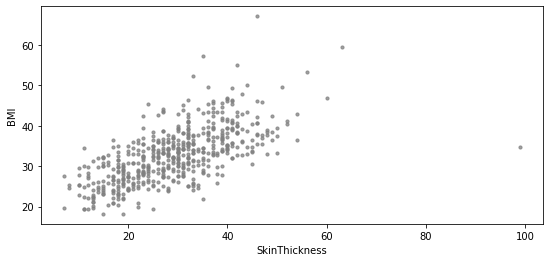

In [ ]:
fig, axs = plt.subplots(1)
fig.set_figheight(4)
fig.set_figwidth(9)

axs.scatter(df2['SkinThickness'], df2['BMI'], color='gray', alpha=0.75, s=10)
axs.set_xlabel('SkinThickness')
axs.set_ylabel('BMI')

fig.show()

In [ ]:
print(f"Correlation: {df2['SkinThickness'].corr(df2['BMI']):.4f}") 

Correlation: 0.6479


In [ ]:
X_temp = df2[['BMI']]
y_temp = df2['SkinThickness']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = 0.25, random_state=1000)

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print(f'Intercept: {l_reg.intercept_:.4f}, Coef: {l_reg.coef_[0]:.4f}')

Intercept: -1.8267, Coef: 0.9377


In [ ]:
# What a nasty code line! \o/
df['SkinThickness'] = df.apply(lambda row: row['SkinThickness'] if row['SkinThickness'] != 0 else l_reg.predict([[row['BMI']]])[0], axis=1)

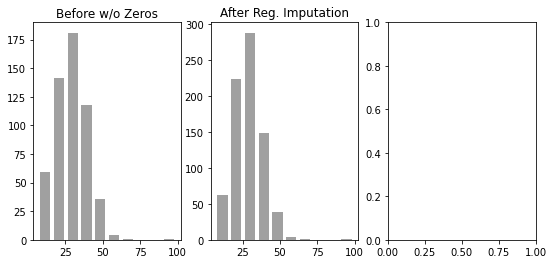

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(9)

bins = 10

axs[0].hist(df2['SkinThickness'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0].set_title('Before w/o Zeros')

axs[1].hist(df['SkinThickness'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1].set_title('After Reg. Imputation')

fig.show()

**Tratamento da Feature: Insulin (Regression imputation)**

Foi utilizado a mesma estratégia de SkinThickness.

In [ ]:
df3 = df.copy()  # Deepcopy!
df3['Insulin'] = df3['Insulin'].replace({0: np.nan})
df3.dropna(inplace=True)

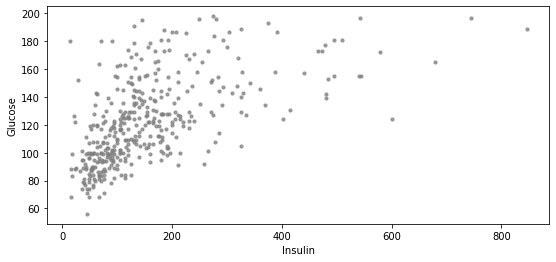

In [ ]:
fig, axs = plt.subplots(1)
fig.set_figheight(4)
fig.set_figwidth(9)

axs.scatter(df3['Insulin'], df3['Glucose'], color='gray', alpha=0.75, s=10)
axs.set_xlabel('Insulin')
axs.set_ylabel('Glucose')
fig.show()

In [ ]:
print(f"Correlation: {df3['Insulin'].corr(df3['Glucose']):.4f}") 

Correlation: 0.5803


In [ ]:
X_temp = df3[['Glucose']]
y_temp = df3['Insulin']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size = 0.25, random_state=1000)

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
print(f'Intercept: {l_reg.intercept_:.4f}, Coef: {l_reg.coef_[0]:.4f}')

Intercept: -106.0604, Coef: 2.1022


In [ ]:
df['Insulin'] = df.apply(lambda row: row['Insulin'] if row['Insulin'] != 0 else l_reg.predict([[row['Glucose']]])[0], axis=1)

In [ ]:
df[['Insulin', 'Glucose']].describe()

,Insulin,Glucose
count,768.000000,768.000000
mean,151.725932,121.686763
std,95.854471,30.435949
min,-13.562898,44.000000
25%,90.000000,99.750000
50%,131.489993,117.000000
75%,186.147604,140.250000
max,846.000000,199.000000


In [ ]:
# The regression generated a negative value.
df[df < 0] = 0

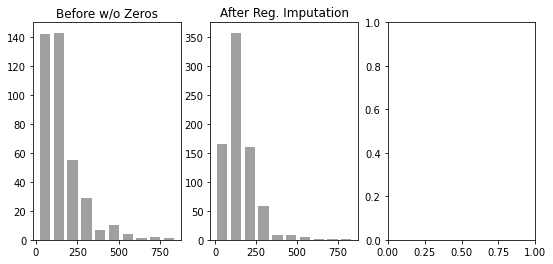

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(9)

bins = 10

axs[0].hist(df3['Insulin'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0].set_title('Before w/o Zeros')

axs[1].hist(df['Insulin'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1].set_title('After Reg. Imputation')

fig.show()

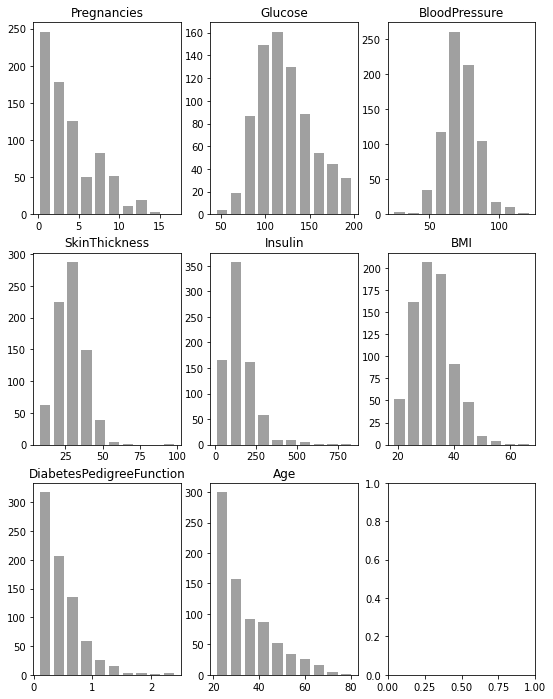

In [ ]:
# Overall view of the dataset! Way better! =)
fig, axs = plt.subplots(3, 3)
fig.set_figheight(12)
fig.set_figwidth(9)

bins = 10

axs[0, 0].hist(df['Pregnancies'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 0].set_title('Pregnancies')
axs[0, 1].hist(df['Glucose'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 1].set_title('Glucose')
axs[0, 2].hist(df['BloodPressure'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[0, 2].set_title('BloodPressure')
axs[1, 0].hist(df['SkinThickness'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 0].set_title('SkinThickness')
axs[1, 1].hist(df['Insulin'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 1].set_title('Insulin')
axs[1, 2].hist(df['BMI'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[1, 2].set_title('BMI')
axs[2, 0].hist(df['DiabetesPedigreeFunction'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[2, 0].set_title('DiabetesPedigreeFunction')
axs[2, 1].hist(df['Age'], bins, color='grey', alpha=0.75, rwidth=0.75)
axs[2, 1].set_title('Age')

fig.show()

# 3. Balanceamento do Dataset

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

In [ ]:
# 1st option.
df_minority_upsampled = resample(df_minority, replace=True, n_samples=500, random_state=1000)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
# 2nd option.
df_majority_downsampled = resample(df_majority, replace=False,n_samples=268, random_state=1000)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

# 4. Separação Base Treino / Base Teste

In [ ]:
# 1st option.
X = df_upsampled.drop(['Outcome'], axis = 1)
y = df_upsampled['Outcome']

# 2nd option
# X = df_downsampled.drop(['Outcome'], axis = 1)
# y = df_downsampled['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1000)

In [ ]:
print(f'X_train size: {X_train.shape[0]}')
print(f'y_train size: {y_train.shape[0]}')
print(f'X_test  size: {X_test.shape[0]}')
print(f'y_test  size: {y_test.shape[0]}')

X_train size: 670
y_train size: 670
X_test  size: 330
y_test  size: 330


# 5. Modelagem e Teste (SVM Classifier)



In [ ]:
pipe = Pipeline([
    ('standardscaler', StandardScaler()),
    ('svc' , SVC(random_state=1000))
])

In [ ]:
parameters = [{
    'svc__kernel': ['linear', 'rbf'],
    'svc__C'     : [0.00125 * 2 ** x for x in range(20)],
    'svc__gamma' : [0.015625 * 2 ** x for x in range(20)]}]

In [ ]:
kf = KFold(n_splits = 3, shuffle = True)

In [ ]:
grid_search = GridSearchCV(
    pipe,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = kf,
    verbose = 1,
    n_jobs = -1)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 2156 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.6min finished


In [ ]:
print(f'Best Parameters: {grid_search.best_params_}') 

Best Parameters: {'svc__C': 0.64, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confunsion Matrix')
print('True  Negative:' + f'{cm[0, 0]}'.rjust(4))
print('False Negative:' + f'{cm[1, 0]}'.rjust(4))
print('False Positive:' + f'{cm[0, 1]}'.rjust(4))
print('True  Positive:' + f'{cm[1, 1]}'.rjust(4))

Confunsion Matrix
True  Negative: 129
False Negative:  25
False Positive:  33
True  Positive: 143


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       162
           1       0.81      0.85      0.83       168

    accuracy                           0.82       330
   macro avg       0.83      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



# 6. Modelagem e Teste (Logistic Regression)

In [ ]:
pipe = Pipeline([
    ('standardscaler', StandardScaler()),
    ('logi' , LogisticRegression(random_state=1000))
])

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
coef = pipe.named_steps['logi'].coef_[0]
intercept = pipe.named_steps['logi'].intercept_[0]
print(f'Intercept: {intercept:.4f}, Coef: {[f"{x:.4f}" for x in coef.tolist()]}')

Intercept: 0.0306, Coef: ['0.3260', '1.1587', '0.0537', '-0.0063', '-0.1824', '0.5461', '0.2067', '0.1763']


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confunsion Matrix')
print('True  Negative:' + f'{cm[0, 0]}'.rjust(4))
print('False Negative:' + f'{cm[1, 0]}'.rjust(4))
print('False Positive:' + f'{cm[0, 1]}'.rjust(4))
print('True  Positive:' + f'{cm[1, 1]}'.rjust(4))

Confunsion Matrix
True  Negative: 131
False Negative:  56
False Positive:  31
True  Positive: 112


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       162
           1       0.78      0.67      0.72       168

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



# 7. Modelagem e Test (KNeighbors Classifier)

In [ ]:
pipe = Pipeline([
    ('standardscaler', StandardScaler()),
    ('knn' , KNeighborsClassifier())
])

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confunsion Matrix')
print('True  Negative:' + f'{cm[0, 0]}'.rjust(4))
print('False Negative:' + f'{cm[1, 0]}'.rjust(4))
print('False Positive:' + f'{cm[0, 1]}'.rjust(4))
print('True  Positive:' + f'{cm[1, 1]}'.rjust(4))

Confunsion Matrix
True  Negative: 106
False Negative:  30
False Positive:  56
True  Positive: 138


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       162
           1       0.71      0.82      0.76       168

    accuracy                           0.74       330
   macro avg       0.75      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



# 8 Modelagem e Teste (Random Forest)

In [ ]:
pipe = Pipeline([
    ('standardscaler', StandardScaler()),
    ('rf' , RandomForestClassifier(random_state=1000))
])

In [ ]:
parameters = [{
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_features': [2, 3, 4, 5, 6, 7, 8],
    'rf__max_depth': [4, 5, 6, 7, 8],
    'rf__min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True).tolist()}]

In [ ]:
kf = KFold(n_splits = 3, shuffle = True)

In [ ]:
grid_search = GridSearchCV(
    pipe,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = kf,
    verbose = 1,
    n_jobs = -1)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 11.9min finished


In [ ]:
print(f'Best Parameters: {grid_search.best_params_}') 

Best Parameters: {'rf__max_depth': 7, 'rf__max_features': 5, 'rf__min_samples_split': 0.1, 'rf__n_estimators': 100}


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confunsion Matrix')
print('True  Negative:' + f'{cm[0, 0]}'.rjust(4))
print('False Negative:' + f'{cm[1, 0]}'.rjust(4))
print('False Positive:' + f'{cm[0, 1]}'.rjust(4))
print('True  Positive:' + f'{cm[1, 1]}'.rjust(4))

Confunsion Matrix
True  Negative: 123
False Negative:  29
False Positive:  39
True  Positive: 139


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       162
           1       0.78      0.83      0.80       168

    accuracy                           0.79       330
   macro avg       0.80      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



# 9. Modelagem e Teste (Ensemble Model)



In [ ]:
pipe_svc = Pipeline([
    ('standardscaler', StandardScaler()),
    ('agent' , SVC(random_state=1000))
])

In [ ]:
pipe_logi = Pipeline([
    ('standardscaler', StandardScaler()),
    ('agent' , LogisticRegression(random_state=1000))
])

In [ ]:
pipe_knn = Pipeline([
    ('standardscaler', StandardScaler()),
    ('agent' , KNeighborsClassifier())
])

In [ ]:
pipe_rf = Pipeline([
    ('standardscaler', StandardScaler()),
    ('agent' , RandomForestClassifier(random_state=1000))
])

In [ ]:
estimators = [('svc', pipe_svc), ('logi', pipe_logi), ('knn', pipe_knn), ('rf', pipe_rf)]

pipe_clf = Pipeline([
    ('clf', VotingClassifier(estimators))
])

In [ ]:
kf = KFold(n_splits = 3, shuffle = True)

In [ ]:
# Using the best parameters from the previous sections.
parameters = [{
    'clf__svc__agent__kernel'      : ['rbf'],
    'clf__svc__agent__C'           : [0.64],
    'clf__svc__agent__gamma'       : [1.0],
    'clf__rf__agent__n_estimators' : [100],
    'clf__rf__agent__max_features' : [5],
    'clf__rf__agent__max_depth'    : [7],
    'clf__rf__agent__min_samples_split'   : [0.1]}]

In [ ]:
grid_search = GridSearchCV(
    pipe_clf,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = kf,
    verbose = 1,
    n_jobs = -1)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confunsion Matrix')
print('True  Negative:' + f'{cm[0, 0]}'.rjust(4))
print('False Negative:' + f'{cm[1, 0]}'.rjust(4))
print('False Positive:' + f'{cm[0, 1]}'.rjust(4))
print('True  Positive:' + f'{cm[1, 1]}'.rjust(4))

Confunsion Matrix
True  Negative: 130
False Negative:  37
False Positive:  32
True  Positive: 131


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       162
           1       0.80      0.78      0.79       168

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330

